In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [12]:
# Read an image
img_path = "../images/"
img_name = "lines_2.jfif"
img = cv.imread(img_path + img_name, cv.IMREAD_COLOR)
img_edge = cv.Canny(img, 150, 200, None, 3)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [13]:
# Do Hough transform
angle_step_factor = 0.1
angles = np.linspace(-np.pi / 2, np.pi / 2, int(round(360 / angle_step_factor)), endpoint=False)
img_h, theta, rho = skimage.transform.hough_line(img_edge, theta=angles)

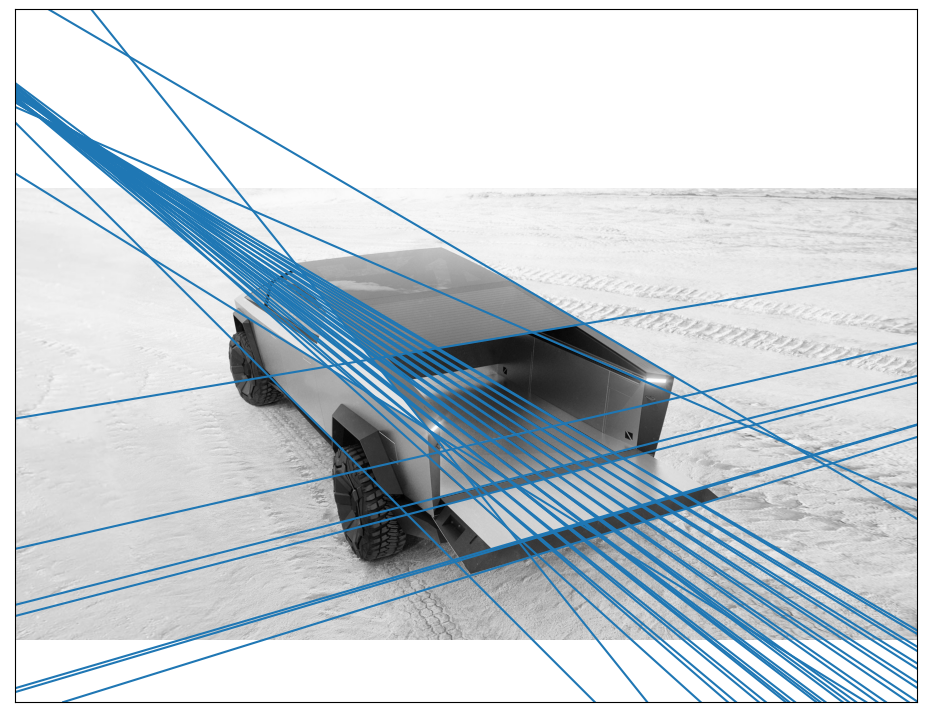

In [16]:
# Output result
fig = plt.figure(figsize=(16, 9))
plt.imshow(cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB))
plt.xticks([]),plt.yticks([])

for _, angle, dist in zip(*skimage.transform.hough_line_peaks(img_h, theta, rho)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.savefig(img_path + img_name.rpartition('.')[0] + '_classic_hough.jpg')